# Project Objective: Create a model that can predict the price of an airbnb unit based on the time of year and listing characteristics.
# Project specifications:
## &emsp;-Data Source: https://insideairbnb.com/get-the-data/
## &emsp;&emsp;   -listings.csv: Contains listing infomation
## &emsp;&emsp;   -calendar.csv: contains the price charged for each listing on each specific date
## &emsp;-Location: Kona side of hawaii. 
## &emsp;-Data Date Range: September 2023 to September 2024

# Notebook Objective: 
## &emsp;-Merge the listings and calendar csv files to create a csv with both listing specific and date specific features. 


In [1]:
import pandas as pd
from datetime import date


def read_zipped_csv(file_path):
    # Initialize an empty list to hold the chunks
    chunks = []

    # Count total number of rows and read data in chunks
    total_rows = 0
    for chunk in pd.read_csv(file_path, compression='gzip', chunksize=10000):
        total_rows += len(chunk)
        chunks.append(chunk)

    print(f"Total number of rows: {total_rows}")

    # Concatenate all chunks into a single DataFrame
    df = pd.concat(chunks, ignore_index=True)
    return df
def get_west_side(df):
    big_island_neighborhoods = [
    'South Kohala',
    'South Kona',
    'North Kona',
    'Puna',
    'South Hilo',
    'Kau',
    'North Hilo',
    'North Kohala',
    'Hamakua'
]
    new_df=df[df['neighbourhood_cleansed'].isin(big_island_neighborhoods)]
    new_df=new_df.drop(columns=['price','minimum_nights','maximum_nights'])
    return new_df
def merge_data(df, listings):
    merged=pd.merge(df, listings,left_on='listing_id',right_on='id',how='inner')
    merged = merged.drop(columns=['id'])
    return merged


In [3]:
def convert_date_column(df):
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Convert 'date' column to datetime, keeping only the date part
    df_copy['date'] = pd.to_datetime(df_copy['date']).dt.date
    
    return df_copy
def create_joined_csv(calendar_path,listings_path):
    df=read_zipped_csv(calendar_path)
    listings1=read_zipped_csv(listings_path)
    west_side1=get_west_side(listings1)
    df['date'] = pd.to_datetime(df['date']).dt.date
    merged=merge_data(df,west_side1)
    return merged


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_average_price(df):
    df['date']=pd.to_datetime(df['date'])
    # Calculate average price by date
    avg_price_by_date = df.groupby('date')['price'].mean().reset_index()

    # Sort the dataframe by date
    avg_price_by_date = avg_price_by_date.sort_values('date')

    # Create the plot
    plt.figure(figsize=(15, 7))
    sns.lineplot(x='date', y='price', data=avg_price_by_date)

    # Customize the plot
    plt.title('Average Price by Date', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Price', fontsize=12)
    plt.xticks(rotation=45)

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Improve the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print some statistics
    print(avg_price_by_date.describe())

    # Print the dates with the highest and lowest average prices
    print("\nDate with highest average price:")
    print(avg_price_by_date.loc[avg_price_by_date['price'].idxmax()])

    print("\nDate with lowest average price:")
    print(avg_price_by_date.loc[avg_price_by_date['price'].idxmin()])

Total number of rows: 12168742
Total number of rows: 33339


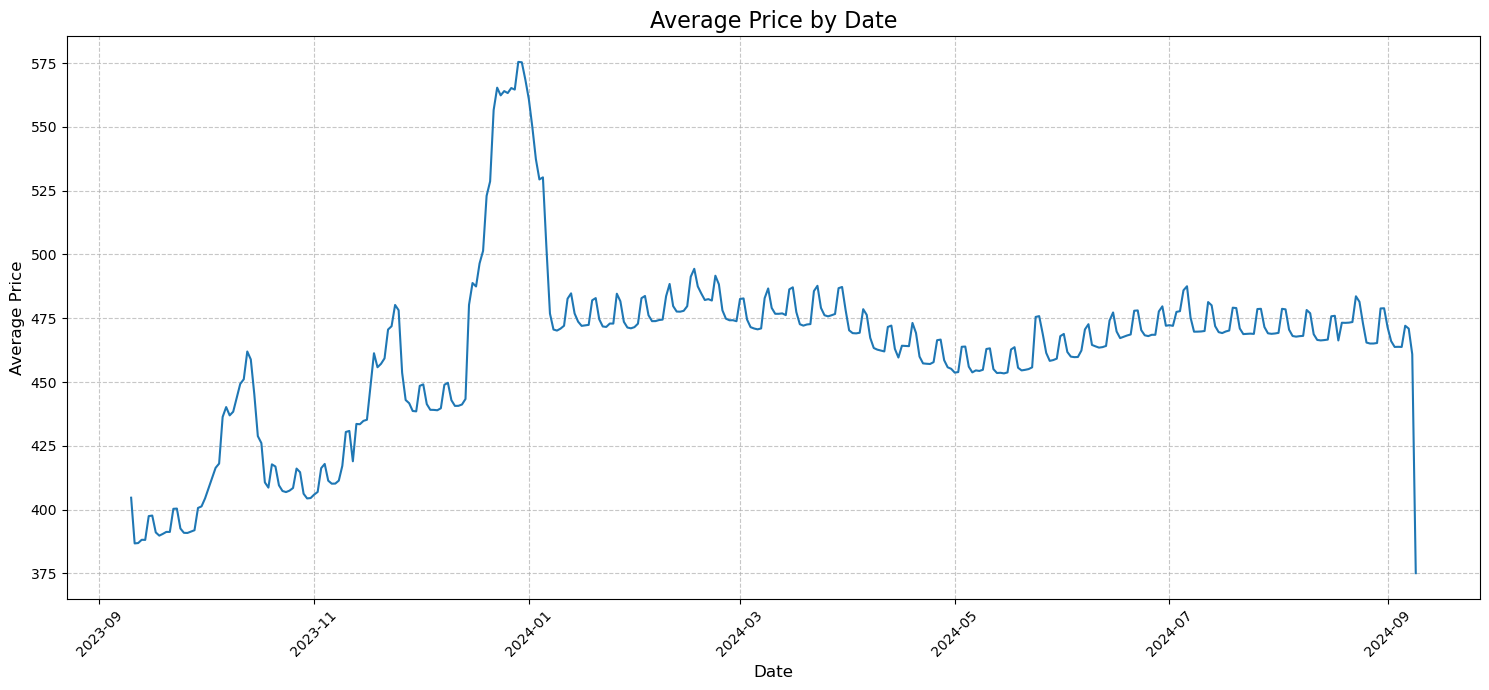

                                date       price
count                            366  366.000000
mean   2024-03-10 11:59:59.999999744  462.778342
min              2023-09-10 00:00:00  375.131103
25%              2023-12-10 06:00:00  453.784226
50%              2024-03-10 12:00:00  468.923180
75%              2024-06-09 18:00:00  476.749582
max              2024-09-09 00:00:00  575.437249
std                              NaN   32.905354

Date with highest average price:
date     2023-12-29 00:00:00
price             575.437249
Name: 110, dtype: object

Date with lowest average price:
date     2024-09-09 00:00:00
price             375.131103
Name: 365, dtype: object
Neighbourhoods ['South Kohala' 'South Kona' 'North Kona' 'North Kohala']
Length of West side Hawaii Dataset 2181240


In [29]:
df3=create_joined_csv('calendar_hawaii3.csv.gz','listings_hawaii3.csv.gz')
west_side_big_island_neighborhoods = [
    'South Kohala',
    'South Kona',
    'North Kona',
    'North Kohala'
]
df3['price']=df3['price'].str.replace(",","").str.replace("$","").astype(float)
final_df=df3[df3['neighbourhood_cleansed'].isin(west_side_big_island_neighborhoods)].copy()
plot_average_price(final_df)
print('Neighbourhoods',final_df['neighbourhood_cleansed'].unique())
write_file=True
if write_file:
    final_df.to_csv('airbnbHawaii.csv',index=False)

print('Length of West side Hawaii Dataset',len(final_df))

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2181240 entries, 0 to 3001396
Data columns (total 78 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   listing_id                                    int64         
 1   date                                          datetime64[ns]
 2   available                                     object        
 3   price                                         float64       
 4   adjusted_price                                object        
 5   minimum_nights                                float64       
 6   maximum_nights                                float64       
 7   listing_url                                   object        
 8   scrape_id                                     int64         
 9   last_scraped                                  object        
 10  source                                        object        
 11  name                         